In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('InterpolatedWithCAPEX2.csv')

In [3]:
df

,Dates,D REVENUE,U CR,D OE,D NOI,U CAPEX,U CWK,D FCF
0,2009-12-31,1884.372544,976.202014,475.249997,757.519678,207.477947,3600.000000,856.600959
1,2010-01-31,1884.566826,983.762225,485.004015,734.017979,207.303532,3638.472896,810.859727
2,2010-02-28,1884.761107,991.322435,494.758033,710.516281,207.129117,3676.945791,765.118495
3,2010-03-31,1884.955389,998.882646,504.512051,687.014582,206.954702,3715.418687,719.377263
4,2010-04-30,1880.767673,1006.377690,481.542613,511.922217,207.283705,3792.839197,732.414605
...,...,...,...,...,...,...,...,...
104,2018-08-31,1785.193900,972.274049,461.469501,414.377788,98.125058,2795.231076,733.164793
105,2018-09-30,1730.706270,953.165883,488.056175,424.307526,95.323030,2858.452805,729.764211
106,2018-10-31,1667.921494,856.900384,471.261535,434.874583,92.144220,2849.606546,737.713784
107,2018-11-30,1605.136718,760.634885,454.466895,445.441639,88.965411,2840.760287,745.663358


In [45]:
max = {'D REVENUE':df['D REVENUE'].max(), 'U CR':df['U CR'].max(), 'D OE':df['D OE'].max(), 
       'D NOI':df['D NOI'].max(),'U CAPEX':df['U CAPEX'].max(), 'U CWK':df['U CWK'].max()} 
min = {'D REVENUE':df['D REVENUE'].min(), 'U CR':df['U CR'].min(), 'D OE':df['D OE'].min(), 
       'D NOI':df['D NOI'].min(),'U CAPEX':df['U CAPEX'].min(), 'U CWK':df['U CWK'].min()} 
filas, columnas = df.count()-1, len(df.columns)-1
dataset = df.values
DFCF = dataset[filas, columnas][1]
print(DFCF)


753.612931


In [5]:
dataset

array([['2009-12-31', 1884.372544, 976.2020142, 475.24999739999987,
        757.519678, 207.4779469, 3600.0, 856.6009594000002],
       ['2010-01-31', 1884.5668256666668, 983.7622247333335, 485.0040154,
        734.0179793333333, 207.30353190000002, 3638.472895666667,
        810.8597272333334],
       ['2010-02-28', 1884.761107333333, 991.3224352666666,
        494.75803339999993, 710.5162806666667, 207.12911689999999,
        3676.945791333333, 765.1184950666667],
       ['2010-03-31', 1884.955389, 998.8826458, 504.5120514, 687.014582,
        206.9547019, 3715.418687, 719.3772629],
       ['2010-04-30', 1880.767673333333, 1006.3776901999997,
        481.5426128333333, 511.92221730000006, 207.28370463333331,
        3792.8391966666654, 732.4146046],
       ['2010-05-31', 1876.5799576666668, 1013.8727346000001,
        458.5731742666666, 336.8298526000001, 207.61270736666665,
        3870.2597063333333, 745.4519462999999],
       ['2010-06-30', 1872.392242, 1021.367779, 435.6037357, 1

In [6]:
X = dataset[:,1:5]
Y = dataset[:,5]

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [8]:
X_scale

array([[0.21536771, 0.34358992, 0.28760773, 1.        ],
       [0.21549004, 0.35192007, 0.32225043, 0.9605532 ],
       [0.21561238, 0.36025022, 0.35689312, 0.92110641],
       [0.21573472, 0.36858036, 0.39153581, 0.88165961],
       [0.21309775, 0.37683871, 0.30995679, 0.58777307],
       [0.21046078, 0.38509706, 0.22837778, 0.29388654],
       [0.2078238 , 0.3933554 , 0.14679876, 0.        ],
       [0.19576386, 0.38652631, 0.09786584, 0.0434695 ],
       [0.18370391, 0.37969722, 0.04893292, 0.086939  ],
       [0.17164397, 0.37286814, 0.        , 0.1304085 ],
       [0.19455526, 0.37922834, 0.05993416, 0.14266337],
       [0.21746656, 0.38558854, 0.11986831, 0.15491825],
       [0.24037786, 0.39194874, 0.17980247, 0.16717312],
       [0.18782438, 0.37456299, 0.15952074, 0.15377192],
       [0.1352709 , 0.35717725, 0.13923902, 0.14037072],
       [0.08271742, 0.33979151, 0.1189573 , 0.12696952],
       [0.09769806, 0.30789075, 0.12775618, 0.12639516],
       [0.11267869, 0.27598999,

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(87, 4) (11, 4) (11, 4) (87,) (11,) (11,)


In [11]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
model = Sequential([
    Dense(6, activation='elu', input_shape=(4,)),
    Dense(32, activation='elu'),
    Dense(12, activation='elu'),
    Dense(1, activation='elu'),
])
#softplus, selu, elu

In [13]:
model.compile(optimizer='adam',
              loss='mean_absolute_error')

In [14]:
hist = model.fit(X_train, Y_train,
          batch_size=64, epochs=1500,
          validation_data=(X_val, Y_val), verbose=1)

Train on 87 samples, validate on 11 samples
Epoch 1/1500
87/87 [==============================] - 0s 5ms/step - loss: 182.4148 - val_loss: 187.8677
Epoch 2/1500
87/87 [==============================] - 0s 103us/step - loss: 182.3815 - val_loss: 187.8362
Epoch 3/1500
87/87 [==============================] - 0s 92us/step - loss: 182.3471 - val_loss: 187.8026
Epoch 4/1500
87/87 [==============================] - 0s 115us/step - loss: 182.3112 - val_loss: 187.7689
Epoch 5/1500
87/87 [==============================] - 0s 92us/step - loss: 182.2743 - val_loss: 187.7347
Epoch 6/1500
87/87 [==============================] - 0s 80us/step - loss: 182.2374 - val_loss: 187.7001
Epoch 7/1500
87/87 [==============================] - 0s 92us/step - loss: 182.1996 - val_loss: 187.6650
Epoch 8/1500
87/87 [==============================] - 0s 103us/step - loss: 182.1605 - val_loss: 187.6293
Epoch 9/1500
87/87 [==============================] - 0s 92us/step - loss: 182.1213 - val_loss: 187.5925
Epoch 10/

Epoch 78/1500
87/87 [==============================] - 0s 92us/step - loss: 163.9362 - val_loss: 169.8298
Epoch 79/1500
87/87 [==============================] - 0s 103us/step - loss: 163.1424 - val_loss: 169.0500
Epoch 80/1500
87/87 [==============================] - 0s 92us/step - loss: 162.3195 - val_loss: 168.2431
Epoch 81/1500
87/87 [==============================] - 0s 92us/step - loss: 161.4644 - val_loss: 167.4085
Epoch 82/1500
87/87 [==============================] - 0s 80us/step - loss: 160.5745 - val_loss: 166.5440
Epoch 83/1500
87/87 [==============================] - 0s 80us/step - loss: 159.6726 - val_loss: 165.6479
Epoch 84/1500
87/87 [==============================] - 0s 92us/step - loss: 158.7328 - val_loss: 164.7234
Epoch 85/1500
87/87 [==============================] - 0s 80us/step - loss: 157.7514 - val_loss: 163.7702
Epoch 86/1500
87/87 [==============================] - 0s 103us/step - loss: 156.7434 - val_loss: 162.7850
Epoch 87/1500
87/87 [=======================

87/87 [==============================] - 0s 69us/step - loss: 82.7738 - val_loss: 88.3988
Epoch 156/1500
87/87 [==============================] - 0s 92us/step - loss: 82.7250 - val_loss: 88.3237
Epoch 157/1500
87/87 [==============================] - 0s 80us/step - loss: 82.6686 - val_loss: 88.2479
Epoch 158/1500
87/87 [==============================] - 0s 80us/step - loss: 82.6079 - val_loss: 88.1696
Epoch 159/1500
87/87 [==============================] - 0s 69us/step - loss: 82.5644 - val_loss: 88.0878
Epoch 160/1500
87/87 [==============================] - 0s 80us/step - loss: 82.4911 - val_loss: 88.0114
Epoch 161/1500
87/87 [==============================] - 0s 92us/step - loss: 82.4437 - val_loss: 87.9297
Epoch 162/1500
87/87 [==============================] - 0s 92us/step - loss: 82.3805 - val_loss: 87.8519
Epoch 163/1500
87/87 [==============================] - 0s 103us/step - loss: 82.3190 - val_loss: 87.7731
Epoch 164/1500
87/87 [==============================] - 0s 80us/step 

87/87 [==============================] - 0s 92us/step - loss: 77.4902 - val_loss: 80.5759
Epoch 234/1500
87/87 [==============================] - 0s 92us/step - loss: 77.4265 - val_loss: 80.4948
Epoch 235/1500
87/87 [==============================] - 0s 80us/step - loss: 77.3576 - val_loss: 80.4002
Epoch 236/1500
87/87 [==============================] - 0s 80us/step - loss: 77.2875 - val_loss: 80.2813
Epoch 237/1500
87/87 [==============================] - 0s 80us/step - loss: 77.2276 - val_loss: 80.1470
Epoch 238/1500
87/87 [==============================] - 0s 69us/step - loss: 77.1312 - val_loss: 80.0181
Epoch 239/1500
87/87 [==============================] - 0s 80us/step - loss: 77.0674 - val_loss: 79.8842
Epoch 240/1500
87/87 [==============================] - 0s 69us/step - loss: 76.9782 - val_loss: 79.7582
Epoch 241/1500
87/87 [==============================] - 0s 92us/step - loss: 76.8828 - val_loss: 79.6229
Epoch 242/1500
87/87 [==============================] - 0s 92us/step -

87/87 [==============================] - 0s 92us/step - loss: 73.0602 - val_loss: 74.3163
Epoch 311/1500
87/87 [==============================] - 0s 103us/step - loss: 73.0102 - val_loss: 74.2737
Epoch 312/1500
87/87 [==============================] - 0s 80us/step - loss: 72.9589 - val_loss: 74.2316
Epoch 313/1500
87/87 [==============================] - 0s 103us/step - loss: 72.9144 - val_loss: 74.1895
Epoch 314/1500
87/87 [==============================] - 0s 80us/step - loss: 72.8639 - val_loss: 74.1489
Epoch 315/1500
87/87 [==============================] - 0s 103us/step - loss: 72.8258 - val_loss: 74.1091
Epoch 316/1500
87/87 [==============================] - 0s 92us/step - loss: 72.7706 - val_loss: 74.0676
Epoch 317/1500
87/87 [==============================] - 0s 92us/step - loss: 72.7226 - val_loss: 74.0264
Epoch 318/1500
87/87 [==============================] - 0s 92us/step - loss: 72.6740 - val_loss: 73.9858
Epoch 319/1500
87/87 [==============================] - 0s 80us/ste

87/87 [==============================] - 0s 92us/step - loss: 69.2886 - val_loss: 70.9719
Epoch 389/1500
87/87 [==============================] - 0s 92us/step - loss: 69.2346 - val_loss: 70.9286
Epoch 390/1500
87/87 [==============================] - 0s 69us/step - loss: 69.1841 - val_loss: 70.8875
Epoch 391/1500
87/87 [==============================] - 0s 92us/step - loss: 69.1338 - val_loss: 70.8506
Epoch 392/1500
87/87 [==============================] - 0s 81us/step - loss: 69.0835 - val_loss: 70.8158
Epoch 393/1500
87/87 [==============================] - 0s 80us/step - loss: 69.0407 - val_loss: 70.7784
Epoch 394/1500
87/87 [==============================] - 0s 80us/step - loss: 68.9798 - val_loss: 70.7353
Epoch 395/1500
87/87 [==============================] - 0s 92us/step - loss: 68.9364 - val_loss: 70.6907
Epoch 396/1500
87/87 [==============================] - 0s 92us/step - loss: 68.8843 - val_loss: 70.6513
Epoch 397/1500
87/87 [==============================] - 0s 103us/step 

Epoch 466/1500
87/87 [==============================] - 0s 92us/step - loss: 64.5340 - val_loss: 67.0023
Epoch 467/1500
87/87 [==============================] - 0s 80us/step - loss: 64.4554 - val_loss: 66.9444
Epoch 468/1500
87/87 [==============================] - 0s 80us/step - loss: 64.3670 - val_loss: 66.8910
Epoch 469/1500
87/87 [==============================] - 0s 69us/step - loss: 64.2876 - val_loss: 66.8333
Epoch 470/1500
87/87 [==============================] - 0s 80us/step - loss: 64.2138 - val_loss: 66.7732
Epoch 471/1500
87/87 [==============================] - 0s 80us/step - loss: 64.1165 - val_loss: 66.7053
Epoch 472/1500
87/87 [==============================] - 0s 80us/step - loss: 64.0173 - val_loss: 66.6377
Epoch 473/1500
87/87 [==============================] - 0s 80us/step - loss: 63.9400 - val_loss: 66.5698
Epoch 474/1500
87/87 [==============================] - 0s 80us/step - loss: 63.8421 - val_loss: 66.5013
Epoch 475/1500
87/87 [==============================] -

Epoch 544/1500
87/87 [==============================] - 0s 80us/step - loss: 52.7258 - val_loss: 58.8444
Epoch 545/1500
87/87 [==============================] - 0s 81us/step - loss: 52.6121 - val_loss: 58.8919
Epoch 546/1500
87/87 [==============================] - 0s 80us/step - loss: 52.5113 - val_loss: 58.9022
Epoch 547/1500
87/87 [==============================] - 0s 80us/step - loss: 52.4940 - val_loss: 58.8658
Epoch 548/1500
87/87 [==============================] - 0s 69us/step - loss: 52.4117 - val_loss: 58.7833
Epoch 549/1500
87/87 [==============================] - 0s 92us/step - loss: 52.3801 - val_loss: 58.7385
Epoch 550/1500
87/87 [==============================] - 0s 80us/step - loss: 52.3456 - val_loss: 58.7470
Epoch 551/1500
87/87 [==============================] - 0s 80us/step - loss: 52.3431 - val_loss: 58.7841
Epoch 552/1500
87/87 [==============================] - 0s 80us/step - loss: 52.3055 - val_loss: 58.7776
Epoch 553/1500
87/87 [==============================] -

Epoch 622/1500
87/87 [==============================] - 0s 92us/step - loss: 51.2472 - val_loss: 56.0807
Epoch 623/1500
87/87 [==============================] - 0s 69us/step - loss: 51.2411 - val_loss: 55.9662
Epoch 624/1500
87/87 [==============================] - 0s 80us/step - loss: 51.2509 - val_loss: 55.8655
Epoch 625/1500
87/87 [==============================] - 0s 80us/step - loss: 51.2458 - val_loss: 55.8375
Epoch 626/1500
87/87 [==============================] - 0s 80us/step - loss: 51.2256 - val_loss: 55.8622
Epoch 627/1500
87/87 [==============================] - 0s 92us/step - loss: 51.2074 - val_loss: 55.8951
Epoch 628/1500
87/87 [==============================] - 0s 92us/step - loss: 51.1836 - val_loss: 55.9367
Epoch 629/1500
87/87 [==============================] - 0s 80us/step - loss: 51.1708 - val_loss: 55.9819
Epoch 630/1500
87/87 [==============================] - 0s 92us/step - loss: 51.1794 - val_loss: 55.9903
Epoch 631/1500
87/87 [==============================] -

Epoch 700/1500
87/87 [==============================] - 0s 69us/step - loss: 50.3357 - val_loss: 53.9047
Epoch 701/1500
87/87 [==============================] - 0s 69us/step - loss: 50.3308 - val_loss: 53.8927
Epoch 702/1500
87/87 [==============================] - 0s 69us/step - loss: 50.3124 - val_loss: 53.8509
Epoch 703/1500
87/87 [==============================] - 0s 80us/step - loss: 50.3022 - val_loss: 53.8183
Epoch 704/1500
87/87 [==============================] - 0s 92us/step - loss: 50.2896 - val_loss: 53.7877
Epoch 705/1500
87/87 [==============================] - 0s 80us/step - loss: 50.2766 - val_loss: 53.7480
Epoch 706/1500
87/87 [==============================] - 0s 69us/step - loss: 50.2657 - val_loss: 53.6995
Epoch 707/1500
87/87 [==============================] - 0s 69us/step - loss: 50.2537 - val_loss: 53.6371
Epoch 708/1500
87/87 [==============================] - 0s 69us/step - loss: 50.2427 - val_loss: 53.5781
Epoch 709/1500
87/87 [==============================] -

Epoch 778/1500
87/87 [==============================] - 0s 80us/step - loss: 49.4580 - val_loss: 51.5997
Epoch 779/1500
87/87 [==============================] - 0s 80us/step - loss: 49.4583 - val_loss: 51.6215
Epoch 780/1500
87/87 [==============================] - 0s 92us/step - loss: 49.4518 - val_loss: 51.6174
Epoch 781/1500
87/87 [==============================] - 0s 80us/step - loss: 49.4482 - val_loss: 51.5903
Epoch 782/1500
87/87 [==============================] - 0s 80us/step - loss: 49.4384 - val_loss: 51.5149
Epoch 783/1500
87/87 [==============================] - 0s 80us/step - loss: 49.4177 - val_loss: 51.3837
Epoch 784/1500
87/87 [==============================] - 0s 69us/step - loss: 49.3876 - val_loss: 51.2649
Epoch 785/1500
87/87 [==============================] - 0s 69us/step - loss: 49.3916 - val_loss: 51.1467
Epoch 786/1500
87/87 [==============================] - 0s 92us/step - loss: 49.3847 - val_loss: 51.0790
Epoch 787/1500
87/87 [==============================] -

87/87 [==============================] - 0s 92us/step - loss: 48.6885 - val_loss: 49.2960
Epoch 857/1500
87/87 [==============================] - 0s 80us/step - loss: 48.6830 - val_loss: 49.2800
Epoch 858/1500
87/87 [==============================] - 0s 103us/step - loss: 48.6728 - val_loss: 49.2877
Epoch 859/1500
87/87 [==============================] - 0s 80us/step - loss: 48.6702 - val_loss: 49.2664
Epoch 860/1500
87/87 [==============================] - 0s 80us/step - loss: 48.6624 - val_loss: 49.2321
Epoch 861/1500
87/87 [==============================] - 0s 81us/step - loss: 48.6547 - val_loss: 49.2069
Epoch 862/1500
87/87 [==============================] - 0s 80us/step - loss: 48.6419 - val_loss: 49.1724
Epoch 863/1500
87/87 [==============================] - 0s 80us/step - loss: 48.6341 - val_loss: 49.1200
Epoch 864/1500
87/87 [==============================] - 0s 80us/step - loss: 48.6302 - val_loss: 49.0973
Epoch 865/1500
87/87 [==============================] - 0s 80us/step 

87/87 [==============================] - 0s 80us/step - loss: 48.2937 - val_loss: 48.2153
Epoch 935/1500
87/87 [==============================] - 0s 103us/step - loss: 48.3079 - val_loss: 48.2301
Epoch 936/1500
87/87 [==============================] - 0s 69us/step - loss: 48.3147 - val_loss: 48.2144
Epoch 937/1500
87/87 [==============================] - 0s 81us/step - loss: 48.3116 - val_loss: 48.1774
Epoch 938/1500
87/87 [==============================] - 0s 80us/step - loss: 48.2945 - val_loss: 48.1400
Epoch 939/1500
87/87 [==============================] - 0s 69us/step - loss: 48.2788 - val_loss: 48.0690
Epoch 940/1500
87/87 [==============================] - 0s 92us/step - loss: 48.2808 - val_loss: 47.9770
Epoch 941/1500
87/87 [==============================] - 0s 195us/step - loss: 48.2476 - val_loss: 47.9022
Epoch 942/1500
87/87 [==============================] - 0s 161us/step - loss: 48.2386 - val_loss: 47.7844
Epoch 943/1500
87/87 [==============================] - 0s 115us/st

Epoch 1012/1500
87/87 [==============================] - 0s 80us/step - loss: 47.9327 - val_loss: 46.5614
Epoch 1013/1500
87/87 [==============================] - 0s 92us/step - loss: 47.9347 - val_loss: 46.5605
Epoch 1014/1500
87/87 [==============================] - 0s 80us/step - loss: 47.9255 - val_loss: 46.5697
Epoch 1015/1500
87/87 [==============================] - 0s 92us/step - loss: 47.9131 - val_loss: 46.5939
Epoch 1016/1500
87/87 [==============================] - 0s 69us/step - loss: 47.9148 - val_loss: 46.6678
Epoch 1017/1500
87/87 [==============================] - 0s 80us/step - loss: 47.9563 - val_loss: 46.7592
Epoch 1018/1500
87/87 [==============================] - 0s 69us/step - loss: 47.9572 - val_loss: 46.7751
Epoch 1019/1500
87/87 [==============================] - 0s 80us/step - loss: 47.9582 - val_loss: 46.7539
Epoch 1020/1500
87/87 [==============================] - 0s 80us/step - loss: 47.9560 - val_loss: 46.7104
Epoch 1021/1500
87/87 [=======================

87/87 [==============================] - 0s 80us/step - loss: 47.6975 - val_loss: 45.7252
Epoch 1090/1500
87/87 [==============================] - 0s 103us/step - loss: 47.7114 - val_loss: 45.7276
Epoch 1091/1500
87/87 [==============================] - 0s 92us/step - loss: 47.7109 - val_loss: 45.7289
Epoch 1092/1500
87/87 [==============================] - 0s 80us/step - loss: 47.6919 - val_loss: 45.7123
Epoch 1093/1500
87/87 [==============================] - 0s 80us/step - loss: 47.6892 - val_loss: 45.6983
Epoch 1094/1500
87/87 [==============================] - 0s 92us/step - loss: 47.6874 - val_loss: 45.7013
Epoch 1095/1500
87/87 [==============================] - 0s 69us/step - loss: 47.6838 - val_loss: 45.6939
Epoch 1096/1500
87/87 [==============================] - 0s 80us/step - loss: 47.6843 - val_loss: 45.6827
Epoch 1097/1500
87/87 [==============================] - 0s 92us/step - loss: 47.6763 - val_loss: 45.6709
Epoch 1098/1500
87/87 [==============================] - 0s 9

87/87 [==============================] - 0s 92us/step - loss: 47.4602 - val_loss: 45.0864
Epoch 1167/1500
87/87 [==============================] - 0s 80us/step - loss: 47.4627 - val_loss: 45.1309
Epoch 1168/1500
87/87 [==============================] - 0s 80us/step - loss: 47.4623 - val_loss: 45.1518
Epoch 1169/1500
87/87 [==============================] - 0s 80us/step - loss: 47.4601 - val_loss: 45.1665
Epoch 1170/1500
87/87 [==============================] - 0s 80us/step - loss: 47.4634 - val_loss: 45.1676
Epoch 1171/1500
87/87 [==============================] - 0s 69us/step - loss: 47.4591 - val_loss: 45.1680
Epoch 1172/1500
87/87 [==============================] - 0s 80us/step - loss: 47.4399 - val_loss: 45.0980
Epoch 1173/1500
87/87 [==============================] - 0s 80us/step - loss: 47.4377 - val_loss: 45.0237
Epoch 1174/1500
87/87 [==============================] - 0s 81us/step - loss: 47.4337 - val_loss: 44.9947
Epoch 1175/1500
87/87 [==============================] - 0s 80

87/87 [==============================] - 0s 69us/step - loss: 47.2610 - val_loss: 44.5660
Epoch 1244/1500
87/87 [==============================] - 0s 80us/step - loss: 47.2639 - val_loss: 44.5116
Epoch 1245/1500
87/87 [==============================] - 0s 80us/step - loss: 47.2579 - val_loss: 44.4848
Epoch 1246/1500
87/87 [==============================] - 0s 80us/step - loss: 47.2618 - val_loss: 44.4623
Epoch 1247/1500
87/87 [==============================] - 0s 80us/step - loss: 47.2585 - val_loss: 44.4902
Epoch 1248/1500
87/87 [==============================] - 0s 80us/step - loss: 47.2651 - val_loss: 44.5233
Epoch 1249/1500
87/87 [==============================] - 0s 92us/step - loss: 47.2575 - val_loss: 44.5256
Epoch 1250/1500
87/87 [==============================] - 0s 80us/step - loss: 47.2518 - val_loss: 44.5592
Epoch 1251/1500
87/87 [==============================] - 0s 80us/step - loss: 47.2525 - val_loss: 44.5901
Epoch 1252/1500
87/87 [==============================] - 0s 80

87/87 [==============================] - 0s 80us/step - loss: 47.2200 - val_loss: 44.4393
Epoch 1321/1500
87/87 [==============================] - 0s 80us/step - loss: 47.2019 - val_loss: 44.4560
Epoch 1322/1500
87/87 [==============================] - 0s 69us/step - loss: 47.2010 - val_loss: 44.4679
Epoch 1323/1500
87/87 [==============================] - 0s 69us/step - loss: 47.2010 - val_loss: 44.4824
Epoch 1324/1500
87/87 [==============================] - 0s 80us/step - loss: 47.1949 - val_loss: 44.4658
Epoch 1325/1500
87/87 [==============================] - 0s 57us/step - loss: 47.1899 - val_loss: 44.4480
Epoch 1326/1500
87/87 [==============================] - 0s 92us/step - loss: 47.1909 - val_loss: 44.4408
Epoch 1327/1500
87/87 [==============================] - 0s 80us/step - loss: 47.1867 - val_loss: 44.4036
Epoch 1328/1500
87/87 [==============================] - 0s 80us/step - loss: 47.1971 - val_loss: 44.3729
Epoch 1329/1500
87/87 [==============================] - 0s 69

87/87 [==============================] - 0s 80us/step - loss: 47.1412 - val_loss: 44.2625
Epoch 1398/1500
87/87 [==============================] - 0s 80us/step - loss: 47.1557 - val_loss: 44.2564
Epoch 1399/1500
87/87 [==============================] - 0s 80us/step - loss: 47.1654 - val_loss: 44.2709
Epoch 1400/1500
87/87 [==============================] - 0s 80us/step - loss: 47.1636 - val_loss: 44.3231
Epoch 1401/1500
87/87 [==============================] - 0s 80us/step - loss: 47.1643 - val_loss: 44.4032
Epoch 1402/1500
87/87 [==============================] - 0s 69us/step - loss: 47.1347 - val_loss: 44.4372
Epoch 1403/1500
87/87 [==============================] - 0s 92us/step - loss: 47.1315 - val_loss: 44.4326
Epoch 1404/1500
87/87 [==============================] - 0s 80us/step - loss: 47.1232 - val_loss: 44.3848
Epoch 1405/1500
87/87 [==============================] - 0s 80us/step - loss: 47.1271 - val_loss: 44.3788
Epoch 1406/1500
87/87 [==============================] - 0s 69

87/87 [==============================] - 0s 80us/step - loss: 47.0726 - val_loss: 44.4368
Epoch 1475/1500
87/87 [==============================] - 0s 92us/step - loss: 47.0621 - val_loss: 44.3874
Epoch 1476/1500
87/87 [==============================] - 0s 80us/step - loss: 47.0593 - val_loss: 44.3598
Epoch 1477/1500
87/87 [==============================] - 0s 80us/step - loss: 47.0605 - val_loss: 44.3228
Epoch 1478/1500
87/87 [==============================] - 0s 80us/step - loss: 47.0761 - val_loss: 44.3156
Epoch 1479/1500
87/87 [==============================] - 0s 80us/step - loss: 47.0705 - val_loss: 44.3802
Epoch 1480/1500
87/87 [==============================] - 0s 92us/step - loss: 47.0636 - val_loss: 44.4050
Epoch 1481/1500
87/87 [==============================] - 0s 103us/step - loss: 47.0644 - val_loss: 44.4088
Epoch 1482/1500
87/87 [==============================] - 0s 92us/step - loss: 47.0633 - val_loss: 44.4294
Epoch 1483/1500
87/87 [==============================] - 0s 6

In [15]:
import matplotlib.pyplot as plt

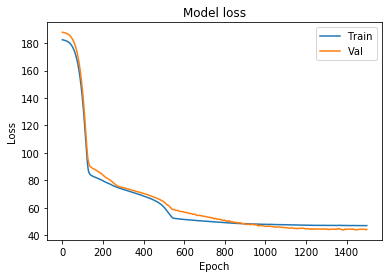

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()